In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.datasets import load_boston
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [2]:
x,y=load_boston(return_X_y=True)

In [3]:
x_train=np.ones((len(x[:400]),x.shape[1]+1))
x_train[:400,1:]=x[:400,:]
y_train=y[:400]

In [4]:
x_test=np.ones((len(x[400:]),x.shape[1]+1))
x_test[:,1:]=x[400:,:]
y_test=y[400:]

In [5]:
# sc=StandardScaler()
# x_train=sc.fit_transform(x_train)
# x_test=sc.fit_transform(x_test)

In [6]:
epochs=20
lr=1e-7
m=len(x_train)
m_test=len(x_test)
bs=10
mbs=5

In [7]:
los=[]
los_test=[]
theta=np.zeros((x_train.shape[1],))

for i in range(epochs):
    
    y_pred=(np.dot(x_train,theta))
    y_pred_test=np.dot(x_test,theta)
    loss=((y_train-y_pred)**2)/(2*m)
    loss_test=((y_test-y_pred_test)**2)/(2*m_test)
    los.append(np.sum(loss))
    los_test.append(np.sum(loss_test))
    
    for k in range(0,len(x_train),bs):
        
        y_pred=(np.dot(x_train[k+3:k+3+mbs,:],theta))

        n=x_train.shape[1]
        temp = np.zeros(theta.shape)

        for j in range(n):
            temp[j]=theta[j]-(lr/mbs)*np.sum((np.dot(y_pred-y_train[k+3:k+3+mbs],x_train[k+3:k+3+mbs,j])))
        theta[:]=temp[:]

In [8]:
y_pred=np.dot(x_train,theta)
y_pred_test=np.dot(x_test,theta)

In [9]:
round(mean_absolute_error(y_test,y_pred_test),2)

4.42

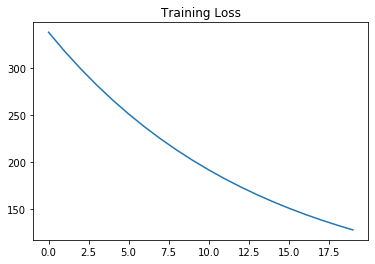

In [10]:
plt.title('Training Loss')
plt.plot(range(epochs),los)

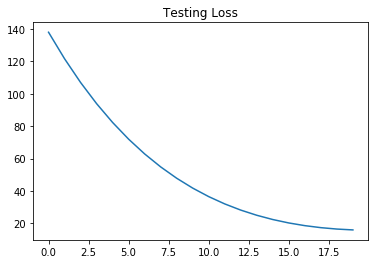

In [11]:
plt.title('Testing Loss')
plt.plot(range(epochs),los_test)